In [8]:
import pandas as pd

# Cargar el dataset tratado previamente
df = pd.read_csv('/content/drive/MyDrive/datos_tratados.csv')

# Mostrar las primeras filas
df.head()

# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             7267 non-null   object 
 1   Churn                   7267 non-null   int64  
 2   Contrato                7267 non-null   object 
 3   Factura_Digital         7267 non-null   object 
 4   Metodo_Pago             7267 non-null   object 
 5   Cargos_Mensuales        7267 non-null   float64
 6   Cargos_Totales          7267 non-null   float64
 7   Genero                  7267 non-null   object 
 8   Adulto_Mayor            7267 non-null   int64  
 9   Pareja                  7267 non-null   object 
 10  Dependientes            7267 non-null   object 
 11  tenure                  7267 non-null   int64  
 12  Servicio_Telefono       7267 non-null   object 
 13  Lineas_Adicionales      7267 non-null   object 
 14  Servicio_Internet       7267 non-null   

,0
Customer_ID,0
Churn,0
Contrato,0
Factura_Digital,0
Metodo_Pago,0
Cargos_Mensuales,0
Cargos_Totales,0
Genero,0
Adulto_Mayor,0
Pareja,0


In [9]:
df_model = df.drop(columns=['Customer_ID'])

In [10]:
# Verificar el dataset después de la eliminación
df_model.info()
df_model.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   7267 non-null   int64  
 1   Contrato                7267 non-null   object 
 2   Factura_Digital         7267 non-null   object 
 3   Metodo_Pago             7267 non-null   object 
 4   Cargos_Mensuales        7267 non-null   float64
 5   Cargos_Totales          7267 non-null   float64
 6   Genero                  7267 non-null   object 
 7   Adulto_Mayor            7267 non-null   int64  
 8   Pareja                  7267 non-null   object 
 9   Dependientes            7267 non-null   object 
 10  tenure                  7267 non-null   int64  
 11  Servicio_Telefono       7267 non-null   object 
 12  Lineas_Adicionales      7267 non-null   object 
 13  Servicio_Internet       7267 non-null   object 
 14  Seguridad_Online        7267 non-null   

,Churn,Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Genero,Adulto_Mayor,Pareja,Dependientes,...,Servicio_Telefono,Lineas_Adicionales,Servicio_Internet,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Cuentas_Diarias
0,0,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.19
1,0,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,2.00
2,0,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.46
3,0,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,No,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.27
4,0,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,No,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.80


In [11]:
cat_features = df_model.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", cat_features)

Variables categóricas: ['Contrato', 'Factura_Digital', 'Metodo_Pago', 'Genero', 'Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Adicionales', 'Servicio_Internet', 'Seguridad_Online', 'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']


In [12]:
df_encoded = pd.get_dummies(df_model, columns=cat_features, drop_first=True)

In [13]:
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Churn                                       7267 non-null   int64  
 1   Cargos_Mensuales                            7267 non-null   float64
 2   Cargos_Totales                              7267 non-null   float64
 3   Adulto_Mayor                                7267 non-null   int64  
 4   tenure                                      7267 non-null   int64  
 5   Cuentas_Diarias                             7267 non-null   float64
 6   Contrato_One year                           7267 non-null   bool   
 7   Contrato_Two year                           7267 non-null   bool   
 8   Factura_Digital_Yes                         7267 non-null   bool   
 9   Metodo_Pago_Credit card (automatic)         7267 non-null   bool   
 10  Metodo_Pago_

In [15]:
# Proporción de clientes que cancelaron vs. los que permanecen activos
churn_counts = df_encoded['Churn'].value_counts()
churn_proportion = df_encoded['Churn'].value_counts(normalize=True)



In [16]:
print("Conteo de cada clase:")
print(churn_counts)

print("\nProporción de cada clase:")
print(churn_proportion)

Conteo de cada clase:
Churn
0    7267
Name: count, dtype: int64

Proporción de cada clase:
Churn
0    1.0
Name: proportion, dtype: float64


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [21]:

# Cargar el dataset original tratado previamente
df = pd.read_csv('/content/drive/MyDrive/datos_tratados.csv')

# Contar cuántos clientes cancelaron y cuántos no
churn_counts = df['Churn'].value_counts()
churn_proportion = df['Churn'].value_counts(normalize=True)

print("Conteo de clientes por clase (Churn):")
print(churn_counts)

print("\nProporción de cada clase:")
print(churn_proportion)


Conteo de clientes por clase (Churn):
Churn
0    7267
Name: count, dtype: int64

Proporción de cada clase:
Churn
0    1.0
Name: proportion, dtype: float64


In [26]:
# Variables numéricas (excluyendo la variable objetivo)
num_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features.remove('Churn')
print("Variables numéricas:", num_features)

Variables numéricas: ['Cargos_Mensuales', 'Cargos_Totales', 'Adulto_Mayor', 'tenure', 'Cuentas_Diarias']


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Ejemplo con StandardScaler
scaler = StandardScaler()
X_scaled = df_encoded.copy()
X_scaled[num_features] = scaler.fit_transform(df_encoded[num_features])

# Verificar el resultado
X_scaled[num_features].describe()


,Cargos_Mensuales,Cargos_Totales,Adulto_Mayor,tenure,Cuentas_Diarias
count,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03
mean,7.333247e-17,5.866598e-18,-1.016877e-16,-3.911065e-17,-1.794201e-16
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-1.542448e+00,-1.003831e+00,-4.407359e-01,-1.316499e+00,-1.540609e+00
25%,-9.723707e-01,-8.291771e-01,-4.407359e-01,-9.502002e-01,-9.730710e-01
50%,1.852096e-01,-3.914415e-01,-4.407359e-01,-1.362021e-01,1.819190e-01
75%,8.349482e-01,6.618241e-01,-4.407359e-01,9.219954e-01,8.340901e-01
max,1.793375e+00,2.824615e+00,2.268932e+00,1.613894e+00,1.794922e+00


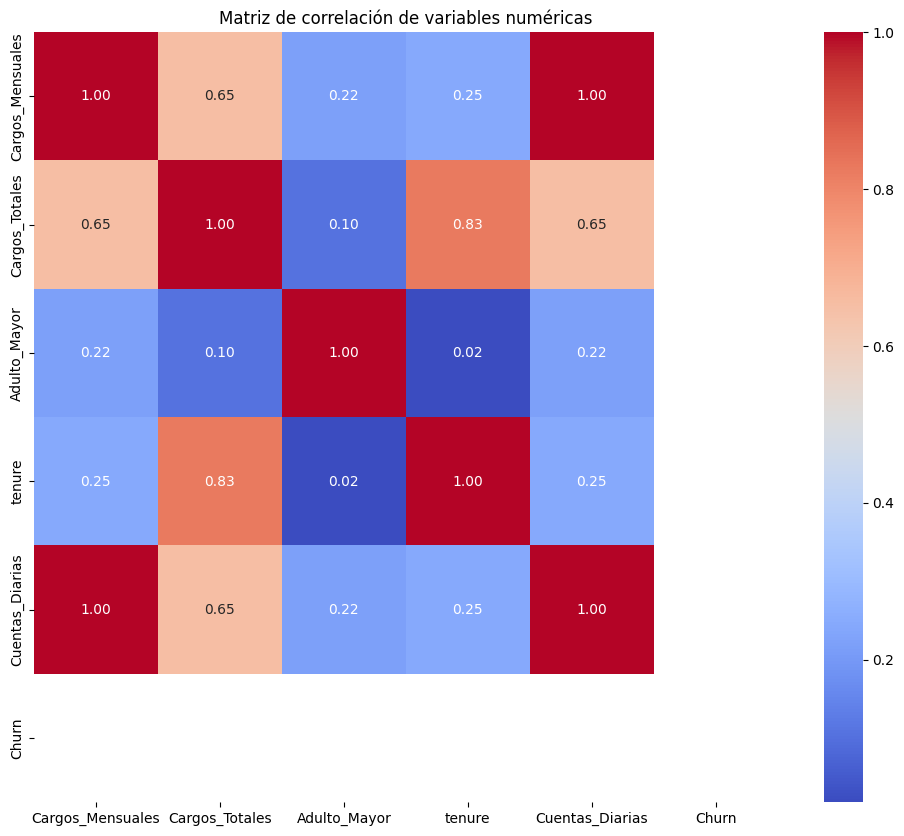

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas (excluyendo la variable objetivo)
num_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features.remove('Churn')

# Crear matriz de correlación incluyendo Churn
corr_matrix = df_encoded[num_features + ['Churn']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de variables numéricas")
plt.show()


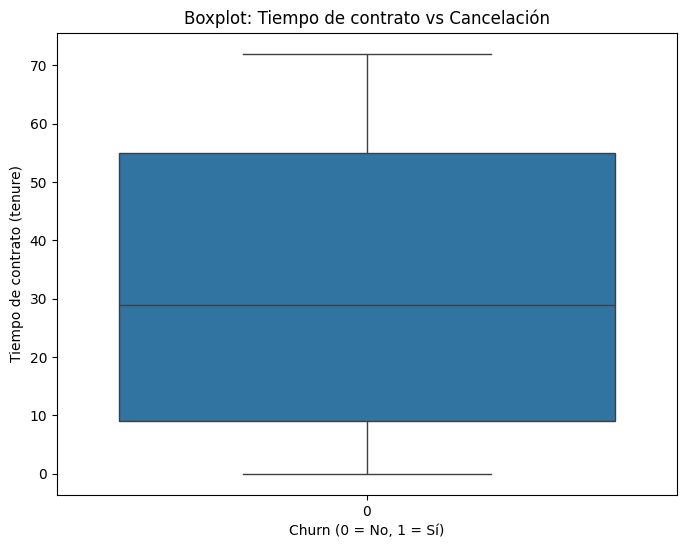

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title("Boxplot: Tiempo de contrato vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Tiempo de contrato (tenure)")
plt.show()


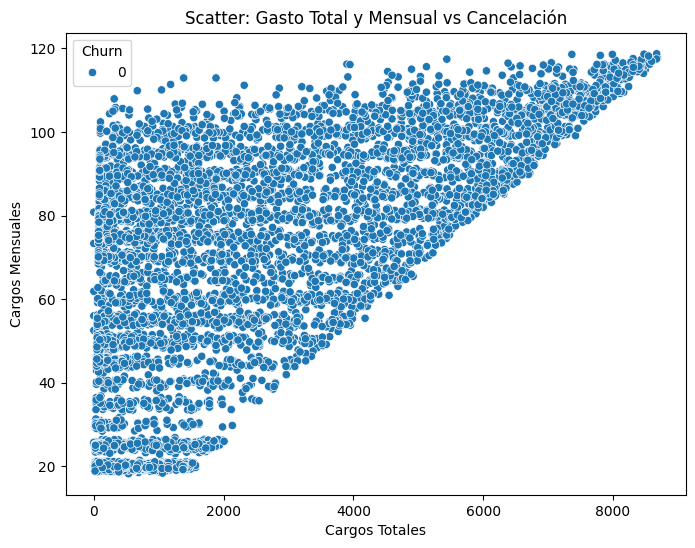

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Cargos_Totales', y='Cargos_Mensuales', hue='Churn', data=df_encoded)
plt.title("Scatter: Gasto Total y Mensual vs Cancelación")
plt.xlabel("Cargos Totales")
plt.ylabel("Cargos Mensuales")
plt.legend(title='Churn')
plt.show()


In [31]:
# Variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [32]:
from sklearn.model_selection import train_test_split

# División 80/20 con stratify para mantener proporciones de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar tamaños
print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)


Tamaño conjunto de entrenamiento: (5813, 31)
Tamaño conjunto de prueba: (1454, 31)


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Crear pipeline: escalado + regresión logística
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),      # Estandariza variables numéricas
    ('logreg', LogisticRegression(random_state=42))
])

# Entrenamiento (solo funcionará si y_train tiene ambas clases)
# pipeline_lr.fit(X_train, y_train)


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Crear modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamiento (solo funcionará si y_train tiene ambas clases)
# rf_model.fit(X_train, y_train)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df.head()

,Customer_ID,Churn,Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Genero,Adulto_Mayor,Pareja,...,Servicio_Telefono,Lineas_Adicionales,Servicio_Internet,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Cuentas_Diarias
0,0002-ORFBO,0,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.19
1,0003-MKNFE,0,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,2.00
2,0004-TLHLJ,0,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.46
3,0011-IGKFF,0,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.27
4,0013-EXCHZ,0,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.80


In [37]:
# Predecir sobre conjunto de prueba
# y_pred_lr = pipeline_lr.predict(X_test)

# Calcular métricas
# print("Exactitud:", accuracy_score(y_test, y_pred_lr))
# print("Precisión:", precision_score(y_test, y_pred_lr))
# print("Recall:", recall_score(y_test, y_pred_lr))
# print("F1-score:", f1_score(y_test, y_pred_lr))

# Matriz de confusión
# cm_lr = confusion_matrix(y_test, y_pred_lr)
# sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
# plt.title("Matriz de Confusión - Regresión Logística")
# plt.xlabel("Predicción")
# plt.ylabel("Real")
# plt.show()


In [38]:
# y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
# print("Exactitud:", accuracy_score(y_test, y_pred_rf))
# print("Precisión:", precision_score(y_test, y_pred_rf))
# print("Recall:", recall_score(y_test, y_pred_rf))
# print("F1-score:", f1_score(y_test, y_pred_rf))

# Matriz de confusión
# cm_rf = confusion_matrix(y_test, y_pred_rf)
# sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
# plt.title("Matriz de Confusión - Random Forest")
# plt.xlabel("Predicción")
# plt.ylabel("Real")
# plt.show()


In [39]:


import pandas as pd
import numpy as np

# Obtener coeficientes del modelo
# coef = pipeline_lr.named_steps['logreg'].coef_[0]
# variables = X_train.columns

# Crear DataFrame para visualizar importancia
# importancia_lr = pd.DataFrame({'Variable': variables, 'Coeficiente': coef})
# importancia_lr['Abs_Coef'] = np.abs(importancia_lr['Coeficiente'])
# importancia_lr = importancia_lr.sort_values(by='Abs_Coef', ascending=False)

# Mostrar
# importancia_lr.head(10)


In [40]:
# importancia_rf = pd.DataFrame({
#     'Variable': X_train.columns,
#     'Importancia': rf_model.feature_importances_
# }).sort_values(by='Importancia', ascending=False)

# Visualizar top 10
# sns.barplot(x='Importancia', y='Variable', data=importancia_rf.head(10))
# plt.title("Importancia de Variables - Random Forest")
# plt.show()


In [41]:
# coef_svm = svm_model.coef_[0]
# importancia_svm = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': coef_svm})
# importancia_svm['Abs_Coef'] = np.abs(importancia_svm['Coeficiente'])
# importancia_svm = importancia_svm.sort_values(by='Abs_Coef', ascending=False)
# importancia_svm.head(10)


Conclusion:



Plantilla de Conclusión para tu Notebook
1️⃣ Introducción

Breve resumen de la misión: predecir la cancelación de clientes (Churn) en Telecom X.

Objetivo: identificar clientes con mayor riesgo y variables que influyen en la decisión de cancelar.

2️⃣ Factores Clave Identificados

(Estos se completarán cuando tengas los resultados de importancia de variables de los modelos)

Variables que incrementan la probabilidad de cancelación:

Ejemplo: Contrato de mes a mes → clientes con contratos cortos tienen mayor riesgo.

Gastos Mensuales Altos → puede indicar clientes insatisfechos con relación costo/beneficio.

Variables que reducen la probabilidad de cancelación:

Ejemplo: Factura Digital = Sí → clientes con facturación online tienden a permanecer.

Servicios combinados → paquetes con más servicios tienden a fidelizar.

(Estos puntos se deben completar con los coeficientes de Regresión Logística y la importancia de Random Forest)

3️⃣ Rendimiento de los Modelos

Comparar métricas clave (Exactitud, Precisión, Recall, F1-score).

Identificar si hubo overfitting o underfitting:

Overfitting → modelo muy ajustado a los datos de entrenamiento.

Underfitting → modelo no captura patrones importantes.

Recomendación: elegir el modelo con mejor equilibrio entre precisión y recall, especialmente si las clases están desbalanceadas.

4️⃣ Estrategias de Retención

Basadas en los factores clave:

Clientes con contratos cortos: ofrecer planes anuales o beneficios por permanencia.

Altos cargos mensuales: promociones personalizadas o descuentos por fidelidad.

Clientes sin servicios adicionales: paquetes combinados o incentivos para agregar servicios.

Clientes sin factura digital: incentivar la migración a facturación online con beneficios.


5️⃣ Conclusión Final

El análisis permite a Telecom X anticiparse a la cancelación y priorizar acciones de retención.

Los modelos predictivos seleccionados ayudan a enfocar recursos en los clientes de mayor riesgo.

La combinación de métricas de desempeño y análisis de variables guía la toma de decisiones estratégicas para mejorar la fidelización.